EDA
- EDA stands for Exploratory Data Analysis
- It's a method of analyzing and summarizing the data so we can make observations and assumptions.
- It's also essential for finding issues in the data (DQA : Data Quality Assurance)
- Data exploration includes finding: anomalies, patterns, inspect data quality, test hypotheses and assumptions, etc...
- EDA Techniques:
    - Descriptive Statistics:
        - Measures of Central Tendency
        - Measures of Dispersion
        - Measures of Shape
        - Measures of Relationship
    - Non-Graphical Analysis:
        - Data Aggregation
        - Looking for missing values
        - Examples:
            - `pivot_table()`
            - `groupby()` and `agg()`
            - `crosstab()`
    - Graphical Analysis (Data Visualization)
        - Bar plots
        - Histograms
        - Scatter plots
        - Pie charts
        - Heatmaps

In [112]:
import numpy as np
import pandas as pd

In [113]:
df = pd.read_csv('../HousePrices.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [114]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


**Observations**
- 75% of the houses have a price of $655,000 and below
- On average we have around 3 bedrooms and 2 bathrooms
- Square feet of living space varies widely, but square feet of lot space varies even more widely (based on standard deviation)
- Having a binary indicator for waterfront, we can see that the average is very low (sum of all 1s). Therefore, the majority of the houses don't have a water front
- Average living square footage is 2139
- On Average 75% of the houses have 3 or more bedrooms. 50% of the houses has exactly 3 bedrooms
- The median (50th perc) is $460K and the mean is $550K. Therefore, the distribution is positively skewed.
- House built year ranges from 1900 to 2014

Get the average price, bedrooms, sqft_living, and floors by city

In [115]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [116]:
df.groupby(['city'])[['price', 'bedrooms', 'sqft_living', 'floors']].mean()

,price,bedrooms,sqft_living,floors
city,,,,
Algona,2.072880e+05,3.200000,1608.600000,1.400000
Auburn,2.993404e+05,3.420455,2019.579545,1.448864
Beaux Arts Village,7.450000e+05,3.000000,1490.000000,1.000000
Bellevue,8.471807e+05,3.804196,2694.527972,1.398601
Black Diamond,3.396056e+05,3.222222,1863.333333,1.388889
Bothell,4.814419e+05,3.606061,2319.393939,1.500000
Burien,3.489472e+05,3.337838,1815.337838,1.209459
Carnation,5.087520e+05,3.090909,2392.454545,1.522727
Clyde Hill,1.321945e+06,4.181818,3620.909091,1.181818


In [117]:
df['price_per_sqrft'] = df['price']/df['sqft_living']
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,price_per_sqrft
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,233.582090
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,653.150685
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,177.202073
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,210.000000
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,283.505155


In [118]:
df.groupby(['city'])[['price', 'price_per_sqrft','bedrooms', 'sqft_living', 'floors']].mean()

,price,price_per_sqrft,bedrooms,sqft_living,floors
city,,,,,
Algona,2.072880e+05,129.127871,3.200000,1608.600000,1.400000
Auburn,2.993404e+05,151.345274,3.420455,2019.579545,1.448864
Beaux Arts Village,7.450000e+05,500.000000,3.000000,1490.000000,1.000000
Bellevue,8.471807e+05,318.094865,3.804196,2694.527972,1.398601
Black Diamond,3.396056e+05,224.437981,3.222222,1863.333333,1.388889
Bothell,4.814419e+05,213.743293,3.606061,2319.393939,1.500000
Burien,3.489472e+05,198.257612,3.337838,1815.337838,1.209459
Carnation,5.087520e+05,229.049204,3.090909,2392.454545,1.522727
Clyde Hill,1.321945e+06,351.540603,4.181818,3620.909091,1.181818


In [119]:
df['state'] = df['statezip'].str[:2]
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,price_per_sqrft,state
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,233.582090,WA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,653.150685,WA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,177.202073,WA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,210.000000,WA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,283.505155,WA


## Data Visualization

![choosing the right chart](https://www.labnol.org/images/2008/data-chart-type.png)

Visualization Libraries:
- Builtin visualization in `pandas`
- Foundational `matplotlib`
- Advanced:
    - `seaborn` for statistical analysis 
    - `plotly` for interactive visualization like Tableau and PowerBI
    - `Bokeh` some interactivity with statistical analysis

`pip install matplotlib`

In [120]:
import matplotlib.pyplot as plt

In [121]:
# generate dummy data
x = np.linspace(0, 10, 100)
y = np.sin(x) 

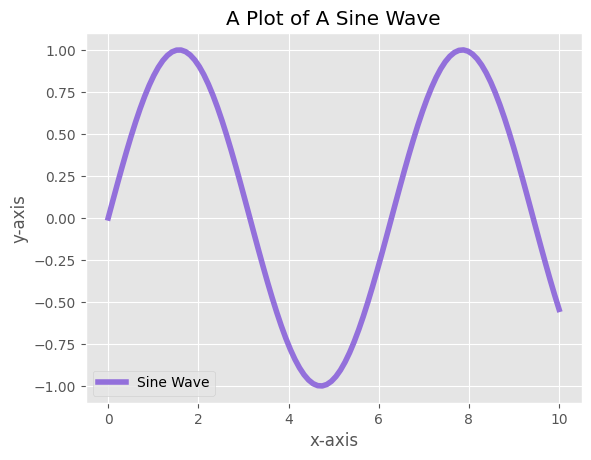

In [122]:
# plot object
plt.plot(x,y, label='Sine Wave', color='mediumpurple', linewidth=4)

#formatting of the plotting area
#x axis title
plt.xlabel('x-axis')
# y axis title
plt.ylabel('y-axis')
#add a title
plt.title('A Plot of A Sine Wave')
#adda a legend
plt.legend()

For color names: https://matplotlib.org/stable/gallery/color/named_colors.html

matplotlib also has themes you can find here: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html 

In [123]:
plt.style.use('ggplot') #you only need to run this once

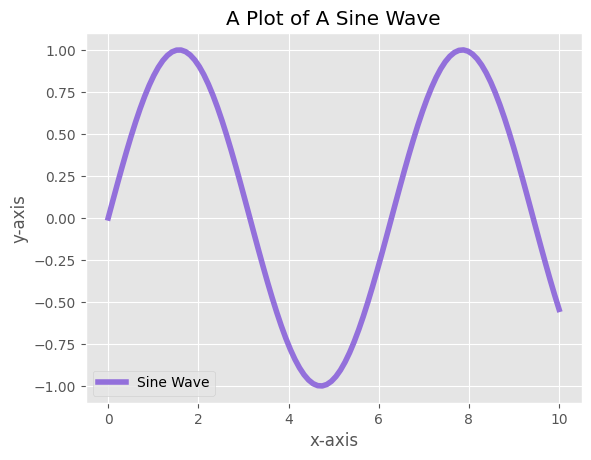

In [124]:
# plot object
plt.plot(x,y, label='Sine Wave', color='mediumpurple', linewidth=4)

#formatting of the plotting area
#x axis title
plt.xlabel('x-axis')
# y axis title
plt.ylabel('y-axis')
#add a title
plt.title('A Plot of A Sine Wave')
#adda a legend
plt.legend()

Using the same plot for 2 or more lines

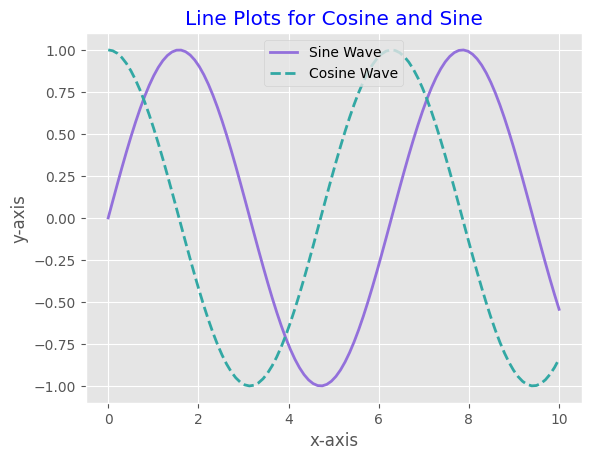

In [125]:
# generate dummy data
x = np.linspace(0, 10, 100)
y1 = np.sin(x) 
y2 = np.cos(x)

# plot object
# first line
plt.plot(x,y1, label='Sine Wave', color='mediumpurple', linewidth=2)
#second line
plt.plot(x,y2, label='Cosine Wave', color='#32a8a4', linewidth=2, linestyle='--')

#formatting of the plotting area
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Line Plots for Cosine and Sine', color='blue')
plt.legend(loc='upper center')

(-2.0, 2.0)

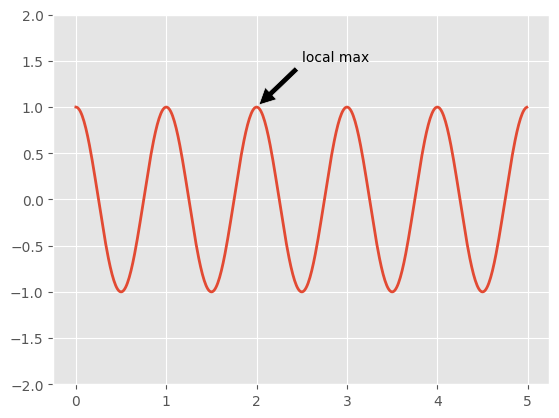

In [126]:
fig, ax = plt.subplots()

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = ax.plot(t, s, lw=2)

ax.annotate('local max', xy=(2, 1), xytext=(2.5, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
ax.set_ylim(-2, 2)

### Bar Plots

<BarContainer object of 3 artists>

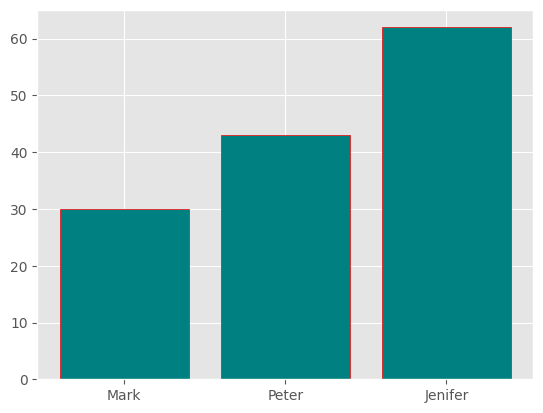

In [127]:
salesperson = ['Mark', 'Peter', 'Jenifer']
sales = [30,43,62]

plt.bar(salesperson, sales, color='teal', edgecolor='red')

## EDA Exercise - Analyzing Data and Exploring Different Chart Types for Real Estate Data 

There are so many variables that impact the price of a house. With dynamic parameters in the residential real state business, it is always important to reach a reasonable price for better business opportunities. As a part of the analytics team in a real state company, you have to come up with the variables that are impacting the price of the house through analyzing and visualizing the data.

In [128]:
df = pd.read_csv('../housing_data.csv',
                 index_col=0 #use the first column as the index
                 )
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,SC60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,SC20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,SC60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,SC70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,SC60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,No,No,No,0,Dec,2008,WD,Normal,250000


In [129]:
df.shape

(1460, 80)

In [130]:
df.sample(15)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
609,SC20,RL,61.0,7943,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Apr,2007,WD,Normal,118500
1214,SC85,RL,69.0,10205,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,No,No,No,0,May,2006,WD,Normal,134500
382,SC60,RL,79.0,9245,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,No,No,No,0,Apr,2007,WD,Normal,213500
761,SC30,RM,60.0,6911,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,No,No,No,0,Oct,2009,WD,Normal,100000
621,SC60,RL,90.0,10800,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Jun,2008,WD,Normal,240000
1288,SC120,RL,40.0,5664,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,No,No,No,0,Oct,2009,WD,Normal,278000
912,SC30,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,No,MnPrv,Shed,620,Jul,2006,WD,Abnorml,88000
131,SC60,RL,0.0,12224,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,No,No,No,0,Jul,2009,WD,Normal,244000
448,SC50,RM,50.0,8600,Pave,NaN,Reg,Bnk,AllPub,Inside,...,0,No,No,No,0,Jun,2006,WD,Normal,119500
35,SC60,RL,108.0,13418,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Sep,2006,WD,Normal,309000


Top 10 neighborhoods by average price

<Axes: ylabel='Neighborhood'>

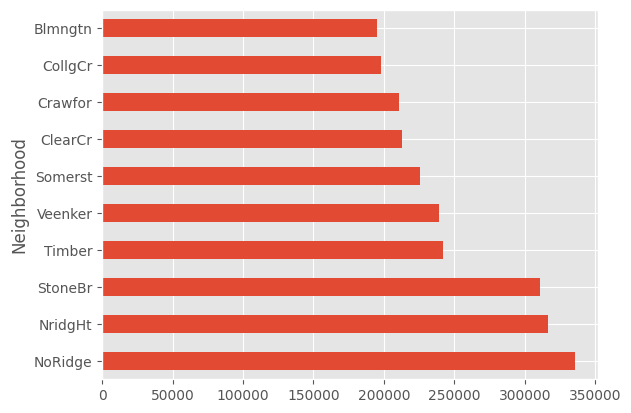

In [131]:
df.groupby(['Neighborhood'])['SalePrice'].mean().nlargest(10).plot(kind='barh')

In [132]:
df.dtypes

MSSubClass        object
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold            object
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

Split the column list into categorical and numerical columns

In [133]:
cat_features_list = df.select_dtypes(include='object').columns
cat_features_list

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [134]:
len(cat_features_list)

45

In [135]:
num_features_list = df.select_dtypes(include=np.number).columns 
num_features_list

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'YrSold', 'SalePrice'],
      dtype='object')

> Be aware of categorical columns that have numerical values. e.g. OverallQual

### About Seaborn
- `pip install seaborn`
- Powerful data visualization library that is built on top of `matplotlib`
- It is rich with statistical graphs, such as histograms, regression, heatmaps, etc...
- It works very well with `pandas`

In [136]:
!pip show seaborn

Name: seaborn
Version: 0.13.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: /Users/manlikeabro/Documents/repos/ML/venv/lib/python3.9/site-packages
Requires: matplotlib, numpy, pandas
Required-by: 


`pip install seaborn==0.12.2`

In [137]:
import seaborn as sns

### Univariate Analysis
- "uni" means single 
- analyzing a single column/feature/variable 
- It can be done on numerical or categorical variables
- Chart Types:
    - Histogram
    - KDE (Bell Curve or density plot)
    - Box and Whisker
    - Swarm
    - Pie chart

#### Categorical Histograms

<Axes: xlabel='BldgType', ylabel='Count'>

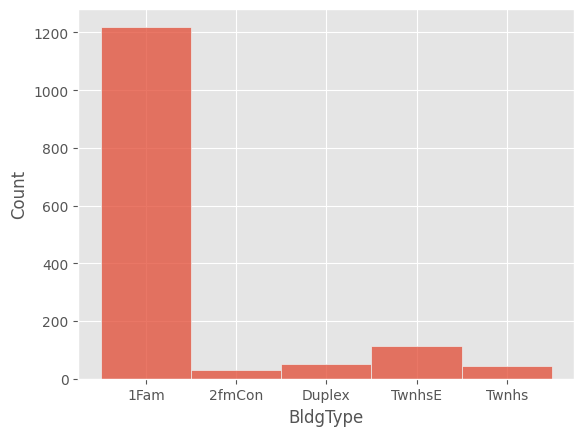

In [138]:
sns.histplot(data=df, x='BldgType')

**Observation**
- 1 family is the most common building type
- 2 family is the least common

#### Numerical Columns

<Axes: xlabel='SalePrice', ylabel='Count'>

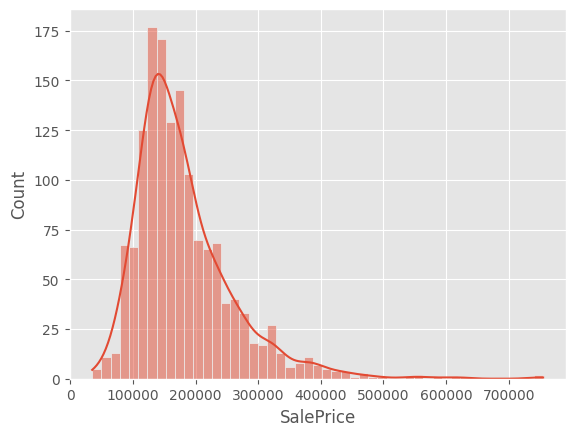

In [139]:
sns.histplot(data=df, x='SalePrice', kde=True) #kde is kernel density estimator 

**Observations**
- The distribution of the SalePrice is positively skewed. Therefore, we have extreme values on the right side (outliers) 
- Outliers at the max price is affecting mean
- Mean > Median

<Axes: xlabel='SalePrice', ylabel='Count'>

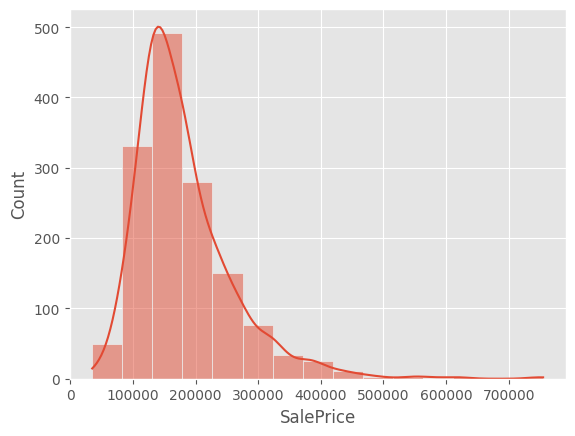

In [140]:
sns.histplot(data=df, x='SalePrice', kde=True, bins=15)

- There's no rule of thumb to the perfect bin size because every data element is different
- The goal is to find a balance between too small bins and too large.

![bins comp](https://statistics.laerd.com/statistical-guides/img/uh/laerd-statistics-example-histograms-showing-different-bin-sizes.png)

![good hist](https://statistics.laerd.com/statistical-guides/img/uh/laerd-statistics-example-histogram-frequencies-for-age.png)

([<matplotlib.axis.XTick at 0x12da42d30>,
 [Text(34900, 0, '34900'),
  Text(84900, 0, '84900'),
  Text(134900, 0, '134900'),
  Text(184900, 0, '184900'),
  Text(234900, 0, '234900'),
  Text(284900, 0, '284900'),
  Text(334900, 0, '334900'),
  Text(384900, 0, '384900')])

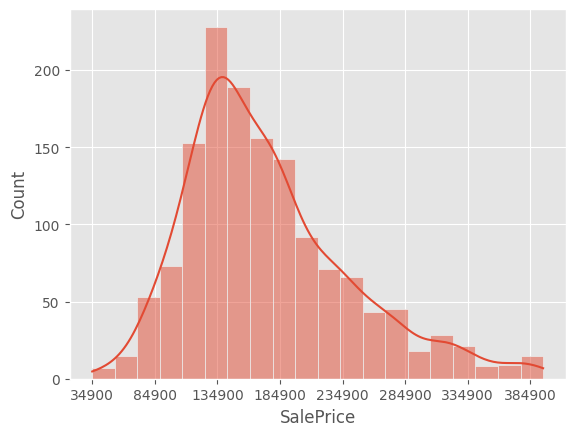

In [141]:
sns.histplot(data=df[df['SalePrice']<400000], x='SalePrice', kde=True, bins=20)
plt.xticks(np.arange(df['SalePrice'].min(), 400000, 50000))

#### Box Plots
![boxplot](https://miro.medium.com/max/9000/1*2c21SkzJMf3frPXPAR_gZA.png)

([<matplotlib.axis.XTick at 0x128c94940>,
 [Text(34900.0, 0, '34900'),
  Text(72650.0, 0, '72650'),
  Text(110400.0, 0, '110400'),
  Text(148150.0, 0, '148150'),
  Text(185900.0, 0, '185900'),
  Text(223650.0, 0, '223650'),
  Text(261400.0, 0, '261400'),
  Text(299150.0, 0, '299150'),
  Text(336900.0, 0, '336900'),
  Text(374650.0, 0, '374650'),
  Text(412400.0, 0, '412400'),
  Text(450150.0, 0, '450150'),
  Text(487900.0, 0, '487900'),
  Text(525650.0, 0, '525650'),
  Text(563400.0, 0, '563400'),
  Text(601150.0, 0, '601150'),
  Text(638900.0, 0, '638900'),
  Text(676650.0, 0, '676650'),
  Text(714400.0, 0, '714400'),
  Text(752150.0, 0, '752150')])

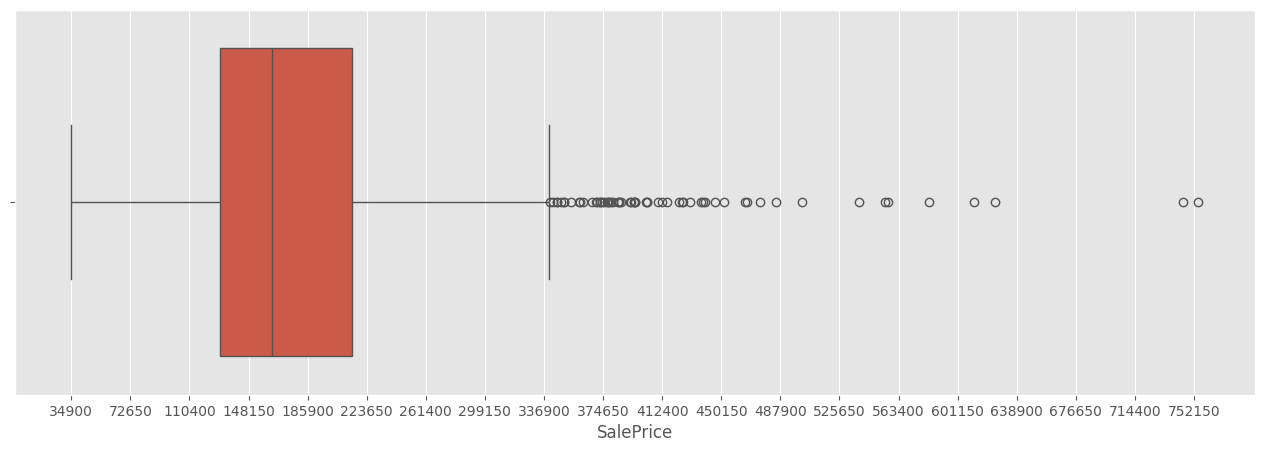

In [142]:
plt.figure(figsize=(16,5))
sns.boxplot(x=df['SalePrice'])
plt.xticks(np.arange(df['SalePrice'].min(),df['SalePrice'].max(),df['SalePrice'].max()/20))

<Axes: xlabel='LotArea'>

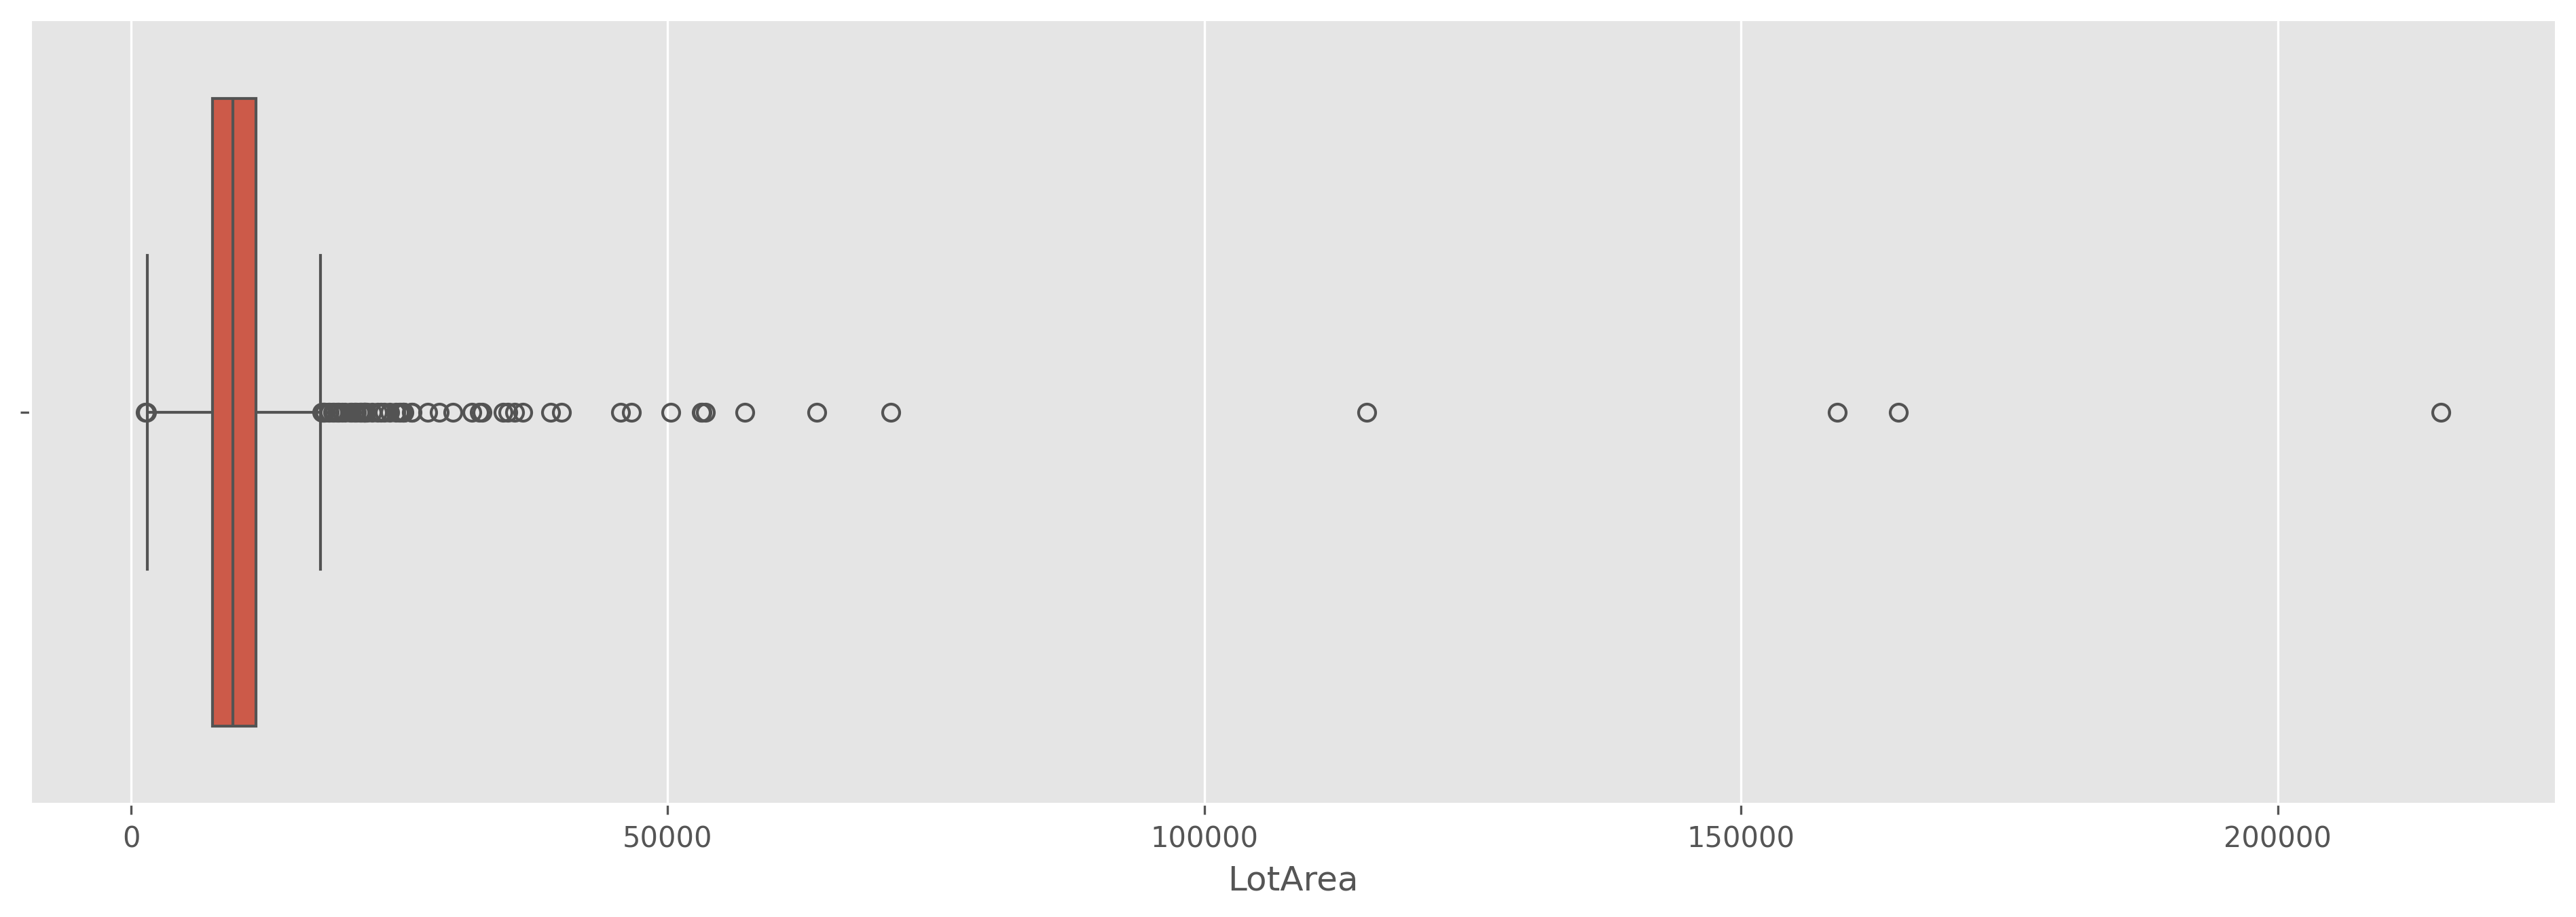

In [143]:
plt.figure(figsize=(16,5), dpi=300)
sns.boxplot(x=df['LotArea'])

**Observation**
LotArea has a lot of outliers, could be because some houses have acres of land.

<Axes: ylabel='LotArea'>

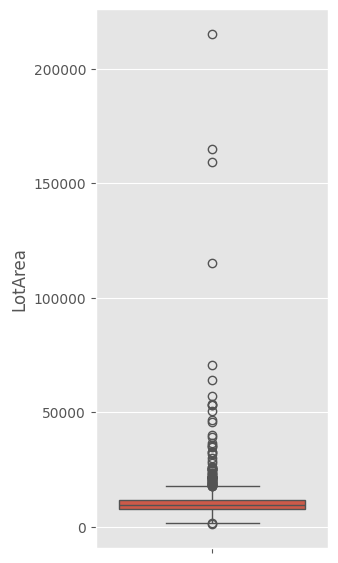

In [144]:
#using vertical view instead of horizontal
plt.figure(figsize=(3,7))
sns.boxplot(y=df['LotArea'])

Using `subplots()`
- `subplots()` is a `matplotlib` functionality that allows plotting multiple views in one
- You basically define a grid of cells and then you specify where to place each plot
- Useful for comparing visuals side-by-side

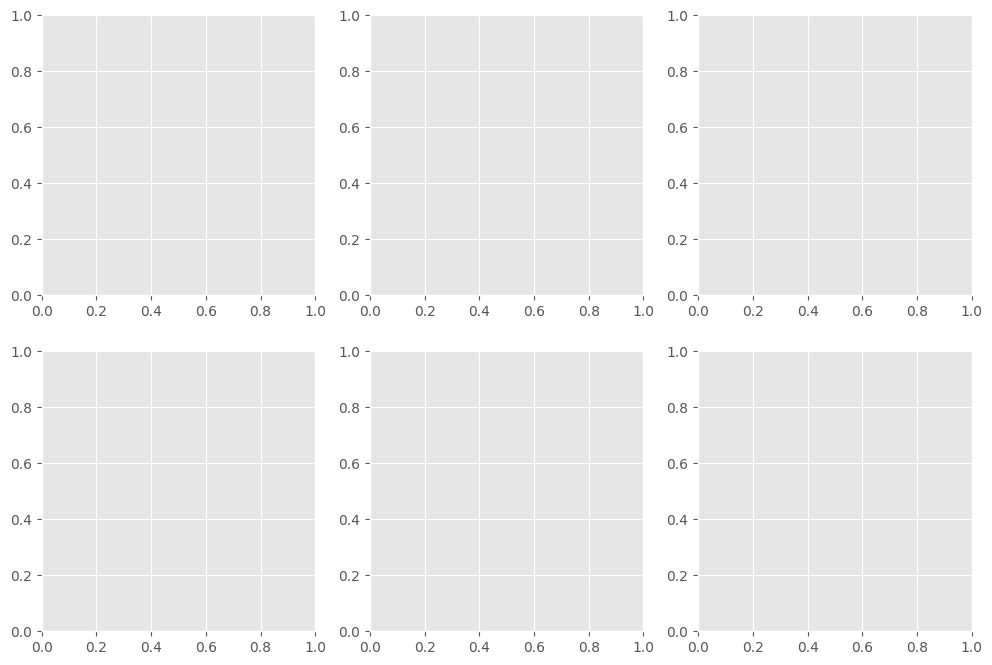

In [145]:
#build a grid (2x3) total of 6 cells
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,8))

**Exercise** Build a side-by-side histogram and box plot visual for Sale Price and Year Built columns

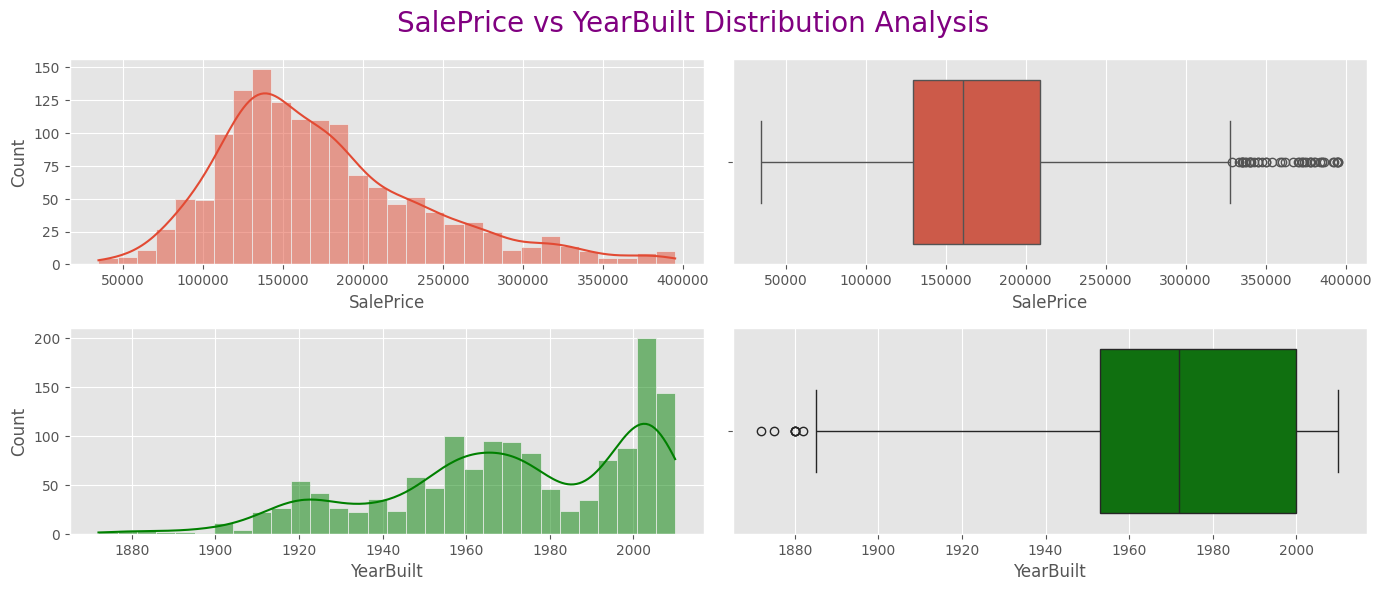

In [146]:
#build a grid (2x2) total of 4 cells
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,6))

#inserting visuals
sns.histplot(data=df[df['SalePrice']<400000], x='SalePrice', bins=30, kde=True, ax=axes[0,0])
sns.histplot(data=df[df['SalePrice']<400000], x='YearBuilt', bins=30, kde=True, ax=axes[1,0], color='green')

sns.boxplot(data=df[df['SalePrice']<400000], x='SalePrice', ax=axes[0,1])
sns.boxplot(data=df[df['SalePrice']<400000], x='YearBuilt', ax=axes[1,1], color='green')

fig.suptitle('SalePrice vs YearBuilt Distribution Analysis', fontsize=20, color='purple')
fig.tight_layout(pad=1.2, w_pad=1)


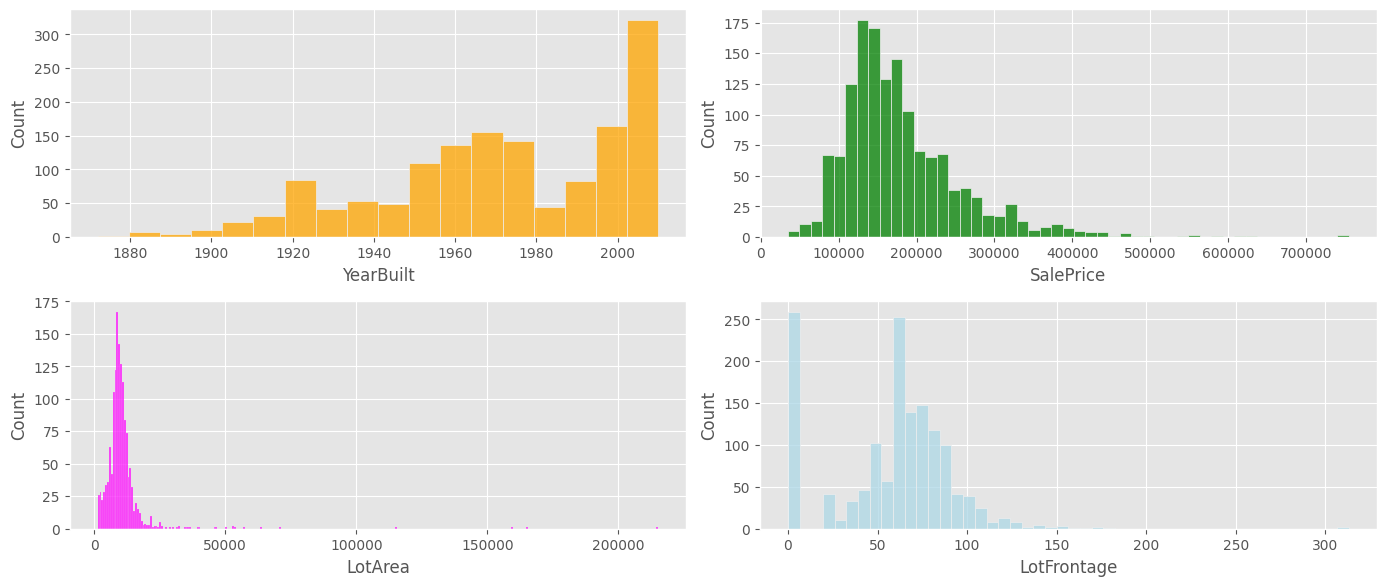

In [147]:
# define a column list
my_plot_cols = ['YearBuilt', 'SalePrice', 'LotArea', 'LotFrontage']
colors_list = ['orange', 'green', 'magenta', 'lightblue']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,6))

#flatten the axes so we can have a series from 0 to 3 instead of [0,0] for example
axes = axes.flatten()

#loop through each column name and plot it
for idx, col in enumerate(my_plot_cols):
    sns.histplot(data=df, x=col, ax=axes[idx], color=colors_list[idx])

fig.tight_layout(pad=1.2, w_pad=1)


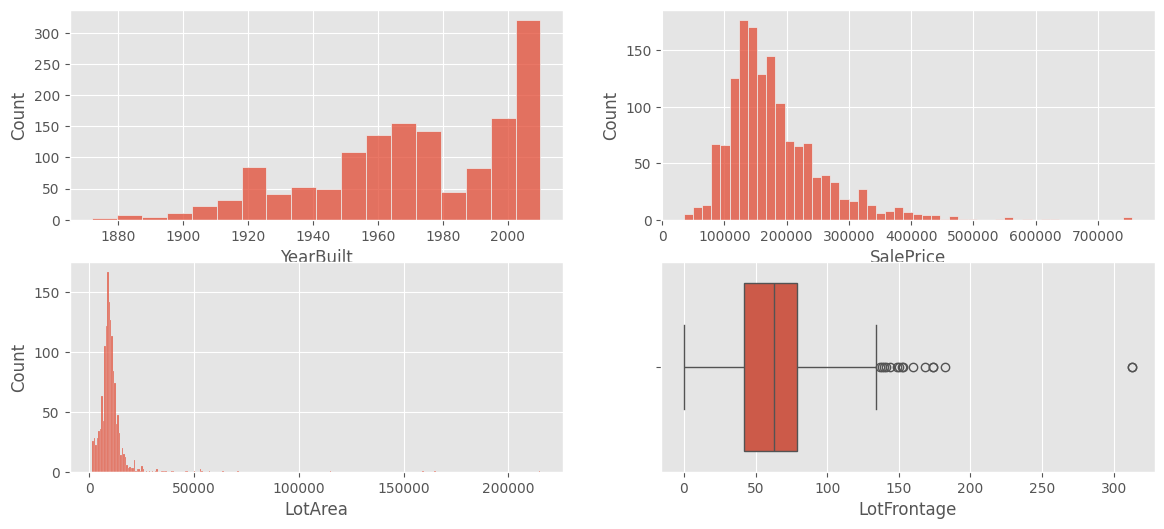

In [148]:
# define a column list
my_plot_cols = ['YearBuilt', 'SalePrice', 'LotArea', 'LotFrontage']
colors_list = ['orange', 'green', 'magenta', 'lightblue']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,6))

#flatten the axes so we can have a series from 0 to 3 instead of [0,0] for example
axes = axes.flatten()

#loop through each column name and plot it
for idx, col in enumerate(my_plot_cols):
    if col == 'LotFrontage':
        sns.boxplot(data=df, x=col, ax=axes[idx], )
    else:
        sns.histplot(data=df, x=col, ax=axes[idx], )

**Homework** using the same technique, build a 3 x 2 grid with histograms of 6 columns

Using `countplot()` for categorical columns

In [149]:
df['SaleCondition'].value_counts()

SaleCondition
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Normal'),
  Text(1, 0, 'Abnorml'),
  Text(2, 0, 'Partial'),
  Text(3, 0, 'AdjLand'),
  Text(4, 0, 'Alloca'),
  Text(5, 0, 'Family')])

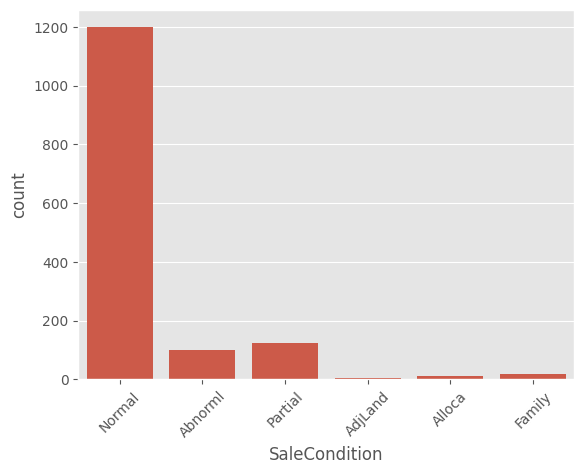

In [150]:
sns.countplot(x=df['SaleCondition'])
plt.xticks(rotation=45) #rotate labels by 45 degrees

In [151]:
df['Neighborhood'].value_counts()

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

In [152]:
end_point = df['Neighborhood'].value_counts().max() + 20 #adding a small buffer for the diagram
steps = end_point//15
end_point, steps

(np.int64(245), np.int64(16))

matplotlib color maps: https://matplotlib.org/stable/users/explain/colors/colormaps.html

/var/folders/h1/8vs1fjpx751cq7y7d5kcr9s80000gn/T/ipykernel_9693/581770148.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Neighborhood']


''

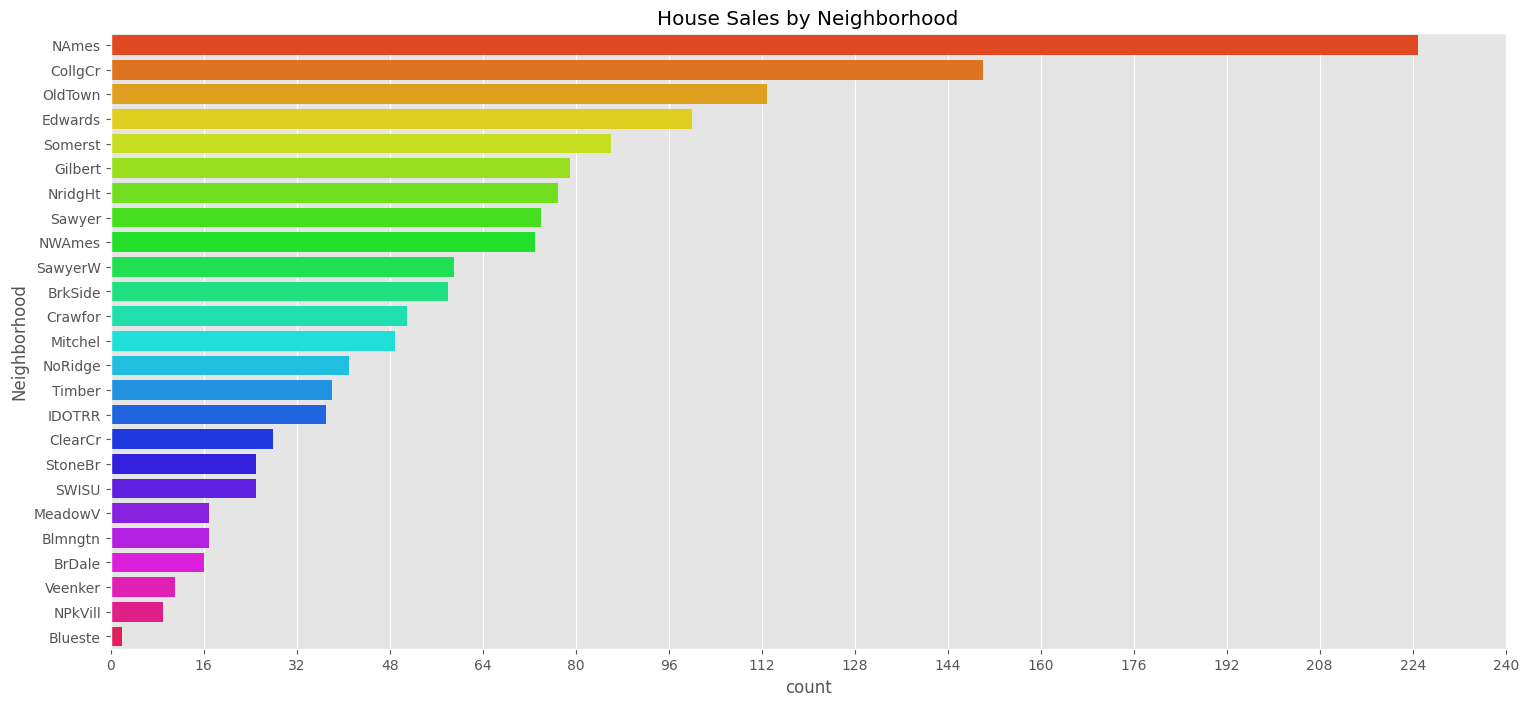

In [153]:
plt.figure(figsize=(18,8))
sns.countplot(y=df['Neighborhood']
              , order=df['Neighborhood'].value_counts().index
              , palette='hsv'
              )
end_point = df['Neighborhood'].value_counts().max() + 20 #adding a small buffer for the diagram
steps = end_point//15
plt.xticks(np.arange(0,end_point,steps))
plt.title('House Sales by Neighborhood')
;

### Multivariate Analysis

- Performing analysis on 2 or more variables/columns
- Finding the relationship between 2 or more attributes
- Types:
    - Numeric vs Numeric
    - Categorical vs Numeric
    - Categorical vs Categorical

#### Numeric vs Numeric

Text(0, 0.5, 'Above grade (ground) living area square feet')

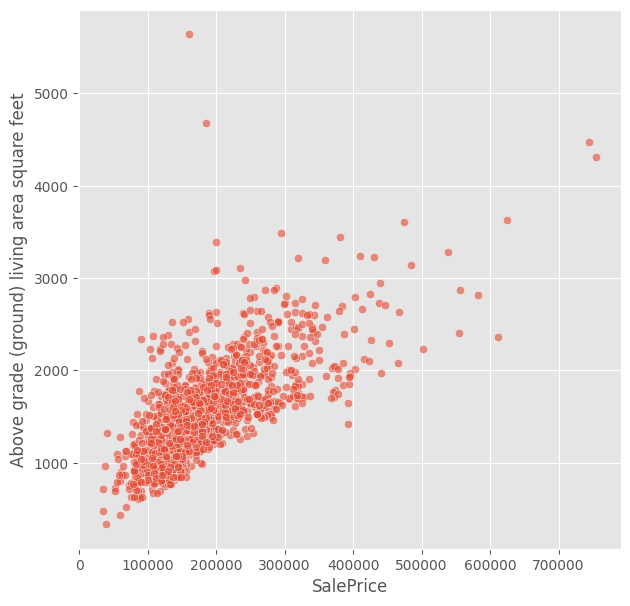

In [154]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df, x='SalePrice', y='GrLivArea', alpha=0.6)
plt.ylabel('Above grade (ground) living area square feet')

- There's a positive relationship between SalePrice and GrLivArea
- If Price goes up, GrLivArea goes up too.

You can add more columns to the analysis above by using shape, color, and size atteibutes

Text(0, 0.5, 'Above grade (ground) living area square feet')

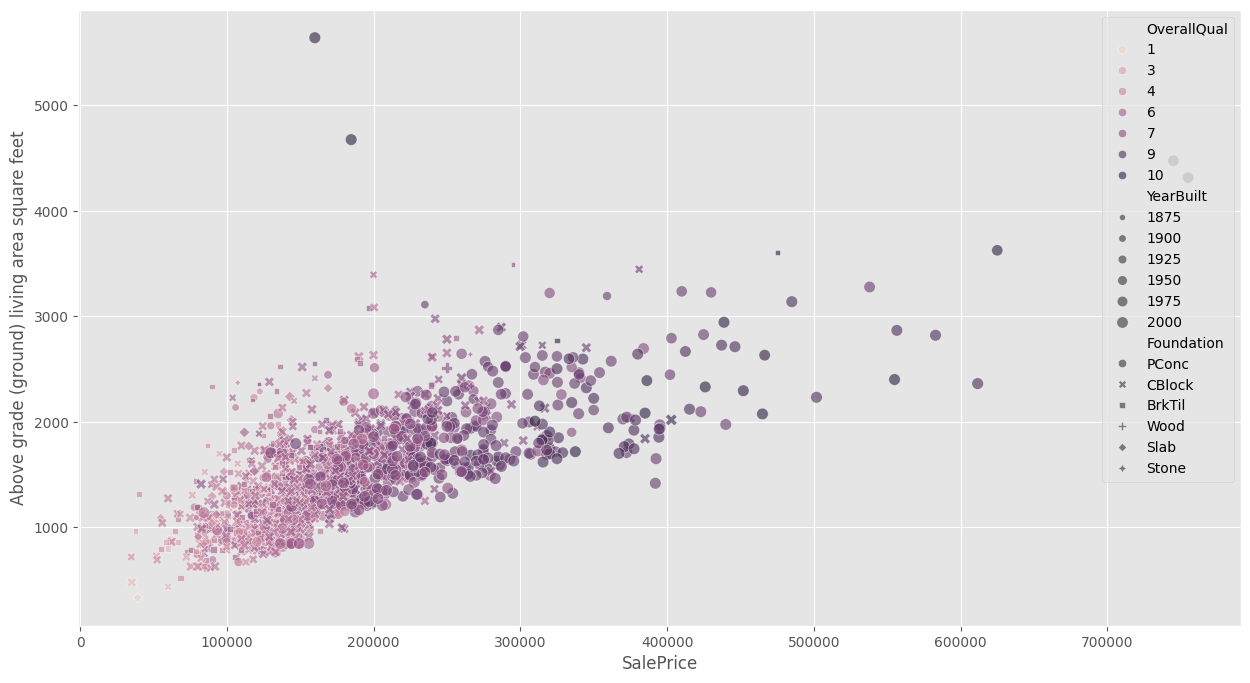

In [155]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x='SalePrice', y='GrLivArea', alpha=0.6
                , hue='OverallQual'
                , size='YearBuilt'
                , style='Foundation'
                )
plt.ylabel('Above grade (ground) living area square feet')

Regression Plot Using `regplot`

Text(0, 0.5, 'Above grade (ground) living area square feet')

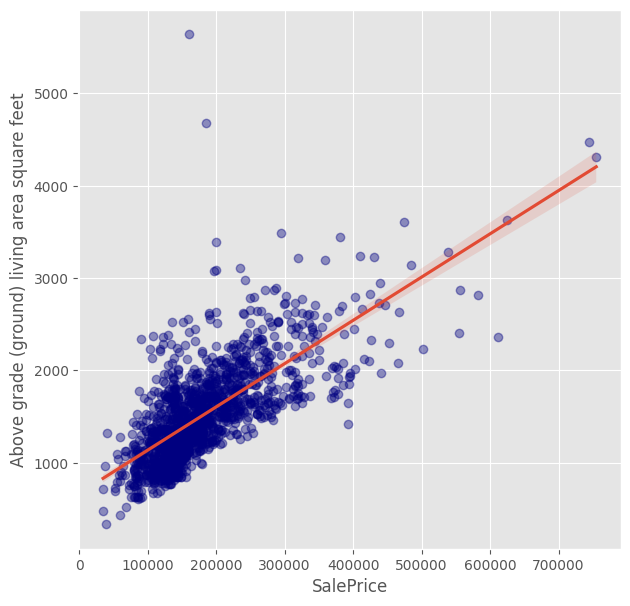

In [156]:
plt.figure(figsize=(7,7))
sns.regplot(data=df, x='SalePrice', y='GrLivArea', scatter_kws={'color':'navy', 'alpha':.4})
plt.ylabel('Above grade (ground) living area square feet')

`joinplot()` is  very useful and comprehensive because it provides:
- Scatterplot
- Regression fitted line
- Histogram of each measure

Text(37.722222222222214, 0.5, 'Above grade (ground) living area square feet')

<Figure size 700x700 with 0 Axes>

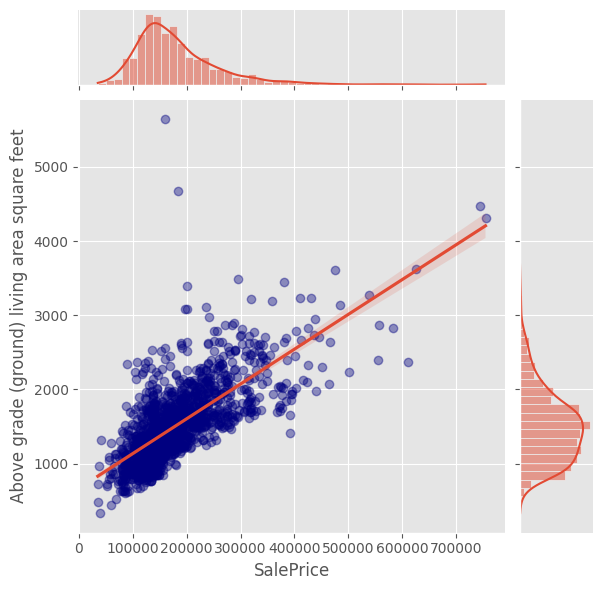

In [157]:
plt.figure(figsize=(7,7))
sns.jointplot(data=df, x='SalePrice', y='GrLivArea', kind='reg', scatter_kws={'color':'navy', 'alpha':.4})
plt.ylabel('Above grade (ground) living area square feet')

- Correlation holds the strongest for houses between $100K and $300K sales price
- the highest concentration is between 100-200
- Lower Sale Price and Lower Above Ground Living Space are strongly correlated
- there is the highest density of saleprice at 150000 where the above grade is around 1500

<Figure size 700x700 with 0 Axes>

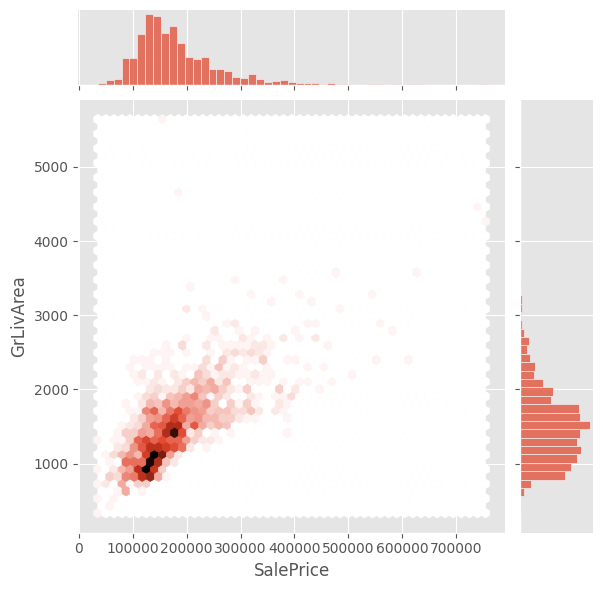

In [158]:
plt.figure(figsize=(7,7))
sns.jointplot(data=df, x='SalePrice', y='GrLivArea', kind='hex')

##### Correlation Analysis and Heatmaps

In [159]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
LotFrontage,1.000000,0.100739,0.176561,-0.053457,0.036853,0.078686,0.105010,0.076670,-0.009312,0.160829,...,0.201473,-0.016780,0.069605,0.027366,0.023499,0.022969,0.114106,-0.059606,-0.012094,0.209624
LotArea,0.100739,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,-0.002618,...,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,-0.014261,0.263843
OverallQual,0.176561,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,0.308159,...,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,-0.027347,0.790982
OverallCond,-0.053457,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,-0.136841,...,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,0.043950,-0.077856
YearBuilt,0.036853,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,...,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,-0.013618,0.522897
YearRemodAdd,0.078686,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,0.181133,...,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.035743,0.507101
MasVnrArea,0.105010,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,0.113862,...,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.008317,0.472614
BsmtFinSF1,0.076670,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,-0.495251,...,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.014359,0.386420
BsmtFinSF2,-0.009312,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,-0.209294,...,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,0.031706,-0.011378
BsmtUnfSF,0.160829,-0.002618,0.308159,-0.136841,0.149040,0.181133,0.113862,-0.495251,-0.209294,1.000000,...,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,-0.041258,0.214479


We can visualize the matrix above for easier analysis

In [111]:
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix)

NameError: name 'corr_matrix' is not defined

<Figure size 1200x1000 with 0 Axes>

- We can see above we have features that correlate with each other and some that don't 
- The view is still busy, we can summarize it further by looking for high correlation
- It's always recommended to start with looking for high correlation with the target (SalePrice) for our predictive model

**Exercise** Build a visual that shows the highly correlated columns with SalePrice (e.g. 0.55 as the threshold)

In [162]:
#define the threshold
threshold = .55

corr_sale_price = corr_matrix['SalePrice']

#get the values that are higher than .55

high_corr_cols = corr_sale_price[abs(corr_sale_price)>threshold].index
high_corr_cols

Index(['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath',
       'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')

<Axes: >

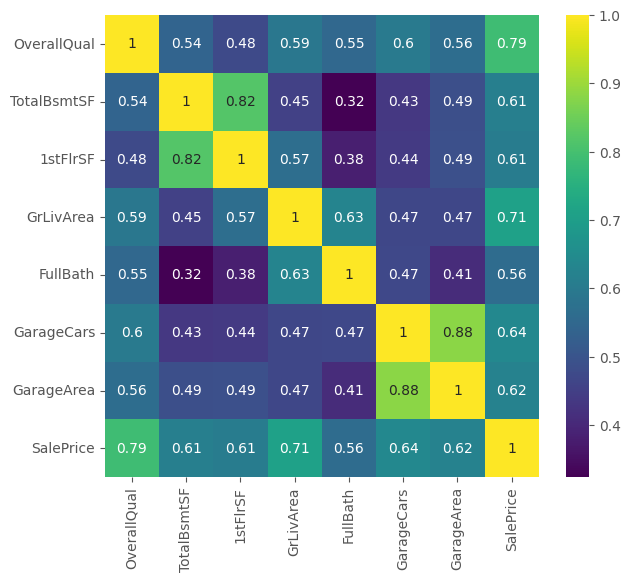

In [165]:
high_corr_cols_matrix = df[high_corr_cols].corr()

plt.figure(figsize=(7,6))
sns.heatmap(high_corr_cols_matrix, cmap='viridis', annot=True)